In [1]:
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np
import ast  # для перетворення рядків у списки
import os

# 📌 Перевіряємо файли у папці
print(os.listdir('../data'))

['.ipynb_checkpoints', 'desktop.ini', 'tmdb_5000_credits.csv', 'tmdb_5000_movies.csv']


In [4]:
# Завантажуємо обидва датасети
movies_df = pd.read_csv('../data/tmdb_5000_movies.csv')
credits_df = pd.read_csv('../data/tmdb_5000_credits.csv')

In [5]:
# Дивимось їх розміри
print(movies_df.shape)
print(credits_df.shape)


(4803, 20)
(4803, 4)


In [6]:
print(movies_df.columns)
print(credits_df.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')
Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


In [7]:
# З'єднуємо їх по id / movie_id
# У movies — 'id', у credits — 'movie_id'
movies_df = movies_df.merge(credits_df, left_on='id', right_on='movie_id')

In [8]:
# Перевіримо розмір після об'єднання
print(movies_df.shape)

(4803, 24)


In [9]:
# Шукаємо дублікати
print(movies_df.duplicated().sum())

0


In [10]:
# Видаляємо дублікати
movies_df.drop_duplicates(inplace=True)

In [11]:
# Перевіримо пропуски
print(movies_df.isnull().sum())

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
movie_id                   0
title_y                    0
cast                       0
crew                       0
dtype: int64


In [12]:
# Приберемо пропуски у важливих колонках (overview замінимо на пустий рядок)
movies_df['overview'] = movies_df['overview'].fillna('')

In [13]:
print(movies_df.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'crew'],
      dtype='object')


In [14]:
# Використаємо 'title_x' (з movies)
movies_df = movies_df.rename(columns={'title_x': 'title'})


In [15]:
# Подивимось кілька фільмів
movies_df[['title', 'genres', 'overview', 'vote_average', 'popularity']].head()

,title,genres,overview,vote_average,popularity
0,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","In the 22nd century, a paraplegic Marine is di...",7.2,150.437577
1,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","Captain Barbossa, long believed to be dead, ha...",6.9,139.082615
2,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",A cryptic message from Bond’s past sends him o...,6.3,107.376788
3,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Following the death of District Attorney Harve...,7.6,112.312950
4,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","John Carter is a war-weary, former military ca...",6.1,43.926995


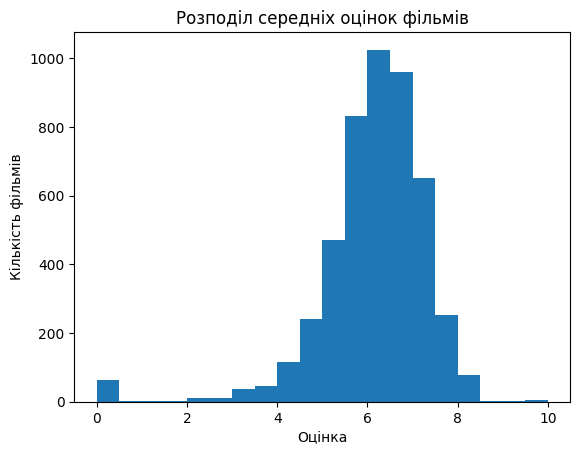

In [16]:
# Гістограма vote_average
plt.hist(movies_df['vote_average'], bins=20)
plt.title('Розподіл середніх оцінок фільмів')
plt.xlabel('Оцінка')
plt.ylabel('Кількість фільмів')
plt.show()

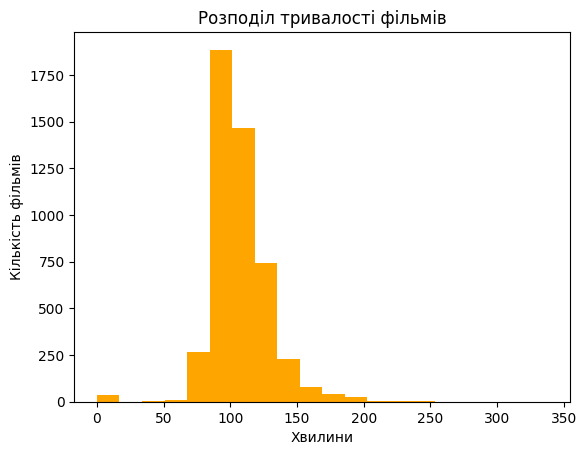

In [17]:
# Гістограма тривалості
plt.hist(movies_df['runtime'].dropna(), bins=20, color='orange')
plt.title('Розподіл тривалості фільмів')
plt.xlabel('Хвилини')
plt.ylabel('Кількість фільмів')
plt.show()

In [18]:
def convert(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
        return L

In [19]:
movies_df['genres'] = movies_df['genres'].apply(convert)

In [20]:
movies_df['keywords'] = movies_df['keywords'].apply(convert)

In [21]:
def get_top_actors(obj):
    L=[]
    for i in ast.literal_eval(obj)[:3]:
        L.append(i['name'])
        return L

In [22]:
movies_df['cast'] = movies_df['cast'].apply(get_top_actors)

In [23]:
# Витягнемо режисера
def get_director(obj):
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            return i['name']
    return np.nan


In [24]:
movies_df['director'] = movies_df['crew'].apply(get_director)

In [25]:
# Дата релізу в рік
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')
movies_df['release_year'] = movies_df['release_date'].dt.year

# Довжина опису
movies_df['overview_length'] = movies_df['overview'].apply(lambda x: len(x.split()))

# Кількість жанрів
movies_df['genre_count'] = movies_df['genres'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Кількість keywords
movies_df['keyword_count'] = movies_df['keywords'].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [28]:
def clean_join(L):
    return " ".join(L) if isinstance(L, list) else ""

In [29]:
# Формуємо tags з об’єднаних текстових ознак

movies_df['genres'] = movies_df['genres'].apply(clean_join)
movies_df['keywords'] = movies_df['keywords'].apply(clean_join)
movies_df['cast'] = movies_df['cast'].apply(clean_join)

# Об’єднуємо все в tags
movies_df['tags'] = movies_df['overview'] + " " + movies_df['genres'] + " " + movies_df['keywords'] + " " + movies_df['cast'] + " " + movies_df['director'].fillna('')

# Останній вигляд фінального датасету
final_df = movies_df[['movie_id','title','tags','vote_average','popularity','runtime','release_year']]

# Подивимось перші рядки
final_df.head()


,movie_id,title,tags,vote_average,popularity,runtime,release_year
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",7.2,150.437577,162.0,2009.0
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",6.9,139.082615,169.0,2007.0
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,6.3,107.376788,148.0,2015.0
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,7.6,112.312950,165.0,2012.0
4,49529,John Carter,"John Carter is a war-weary, former military ca...",6.1,43.926995,132.0,2012.0


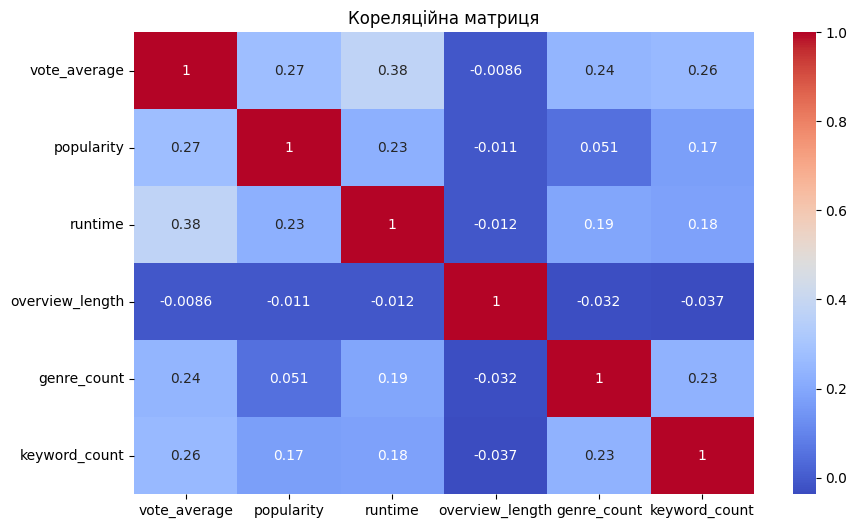

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(movies_df[['vote_average','popularity','runtime','overview_length','genre_count','keyword_count']].corr(), annot=True, cmap='coolwarm')
plt.title('Кореляційна матриця')
plt.show()

In [35]:
final_df.to_csv('../data/processed_movies.csv', index=False)